In [48]:
# import packages we need for exploratory data analysis (EDA)
# to store tabular data
import pandas as pd
# to do some math
import numpy as np
# a popular data visualization tool
import matplotlib.pyplot as plt
# another popular data visualization tool
import seaborn as sns
# allows the notebook to render graphics
%matplotlib inline
# a popular data visualization theme
plt.style.use('fivethirtyeight')

In [49]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is 08C5-4AC1

 Directory of D:\ml_code\data_science\feature_engineering

28/02/2019  10:00    <DIR>          .
28/02/2019  10:00    <DIR>          ..
28/02/2019  09:34    <DIR>          .ipynb_checkpoints
28/02/2019  10:00            42,559 Ch2_scratch.ipynb
28/02/2019  09:01    <DIR>          code
28/02/2019  09:41    <DIR>          data
               1 File(s)         42,559 bytes
               5 Dir(s)  912,288,006,144 bytes free


In [50]:
salary_ranges = pd.read_csv('data\\Salary_Ranges_by_Job_Classification.csv')

In [51]:
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [52]:
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null object
Biweekly Low Rate     1356 non-null object
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [53]:
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [54]:
salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [55]:
salary_ranges = salary_ranges[['Biweekly High Rate','Grade']]
salary_ranges.head()

,Biweekly High Rate,Grade
0,$0.00,00000
1,$15.00,00000
2,$25.00,00000
3,$50.00,00000
4,$100.00,00000


In [56]:
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].map(lambda x:x.replace('$',''))

In [57]:
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
Biweekly High Rate    1356 non-null float64
Grade                 1356 non-null object
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


In [58]:
salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
Biweekly High Rate    1356 non-null float64
Grade                 1356 non-null object
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


In [59]:
salary_ranges['Grade'].value_counts().head()

00000    61
07450    12
07170     9
06870     9
07420     9
Name: Grade, dtype: int64

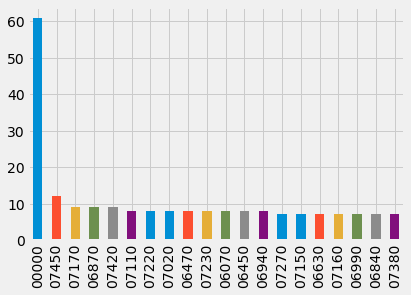

In [60]:
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar');

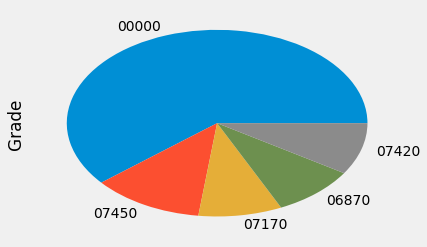

In [62]:
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie');

In [65]:
customer = pd.read_csv('data\\2013_SFO_Customer_survey.csv')
customer.shape

(3535, 95)

In [66]:
art_ratings = customer['Q7A_ART']
art_ratings.describe()

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

In [68]:
art_ratings = art_ratings[(art_ratings >=1) & (art_ratings <=5)]
art_ratings = art_ratings.astype(str)

In [69]:
art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

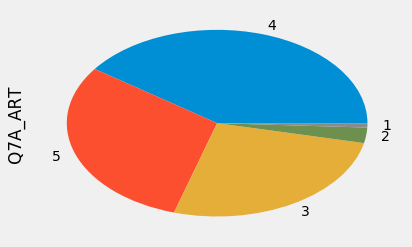

In [70]:
art_ratings.value_counts().plot(kind='pie')

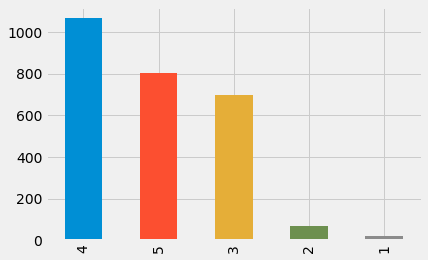

In [71]:
art_ratings.value_counts().plot(kind='bar');

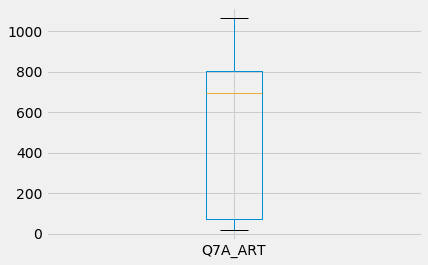

In [72]:
art_ratings.value_counts().plot(kind='box');

In [73]:
art_ratings.value_counts()

4    1066
5     803
3     696
2      71
1      20
Name: Q7A_ART, dtype: int64

In [74]:
climate = pd.read_csv('data/GlobalLandTemperaturesByCity.csv')

In [75]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [76]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [77]:
climate.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [78]:
climate.dropna(axis=0,inplace=True)
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235082 entries, 0 to 8599210
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 502.6+ MB


In [79]:
climate.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [80]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [81]:
climate.AverageTemperature.nunique()

111994

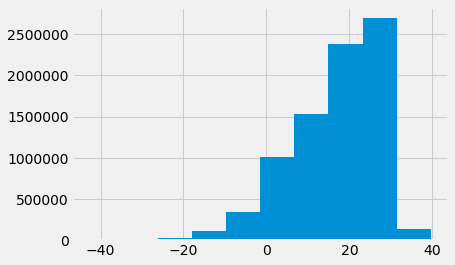

In [82]:
climate.AverageTemperature.hist()

In [83]:
climate.AverageTemperature.describe()

count    8.235082e+06
mean     1.672743e+01
std      1.035344e+01
min     -4.270400e+01
25%      1.029900e+01
50%      1.883100e+01
75%      2.521000e+01
max      3.965100e+01
Name: AverageTemperature, dtype: float64

In [84]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [88]:
climate['dt'] = pd.to_datetime(climate.dt)
climate['year'] = climate['dt'].map(lambda value:value.year)

In [92]:
# Oof, how about a subset the data to just the US?
climate_sub_us = climate.loc[climate['Country'] == 'United States']
climate_sub_us.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,1820
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,1820
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,1820
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,1820
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,1820


In [95]:
climate_sub_us['century'] = climate_sub_us['year'].map(lambda x: x//100+1)

C:\Users\richard\Anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


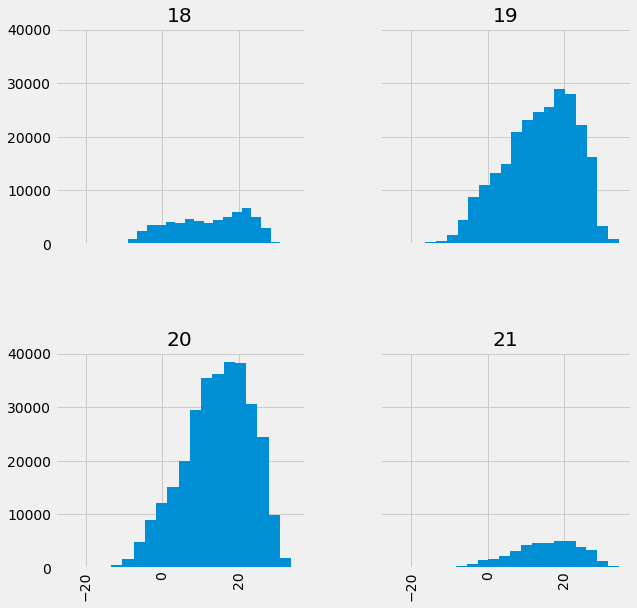

In [98]:
climate_sub_us['AverageTemperature'].hist(by=climate_sub_us['century'],sharex=True,sharey=True,figsize=(10,10),bins=20);

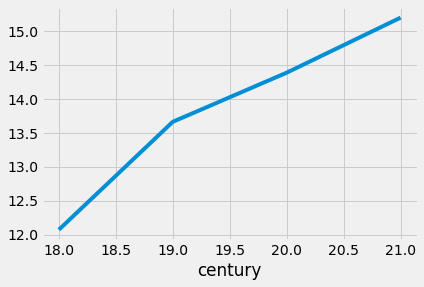

In [103]:
climate_sub_us.groupby('century')['AverageTemperature'].mean().plot(kind='line');

In [105]:
century_changes = climate_sub_us.groupby('century')['AverageTemperature'].mean()
print(century_changes)

century
18    12.073243
19    13.662870
20    14.386622
21    15.197692
Name: AverageTemperature, dtype: float64


In [107]:
century_changes[21] - century_changes[18]

3.124449115460754

In [109]:
climate_sub_us.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,century
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,1820,19
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,1820,19
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,1820,19
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,1820,19
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,1820,19


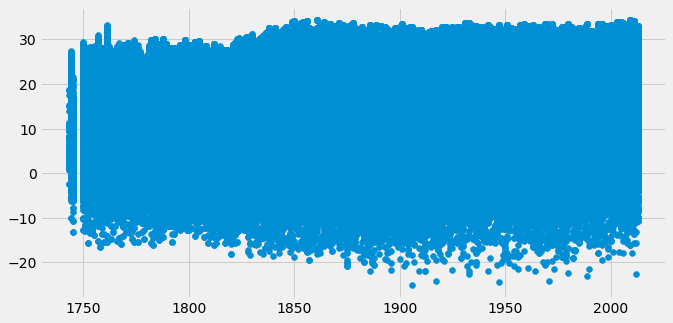

In [110]:
x = climate_sub_us['year']
y = climate_sub_us['AverageTemperature']
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
plt.show()

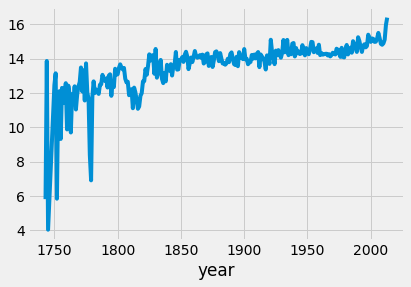

In [112]:
climate_sub_us.groupby('year').mean()['AverageTemperature'].plot()

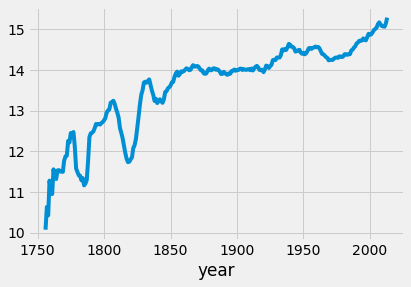

In [119]:
climate_sub_us.groupby('year').mean()['AverageTemperature'].rolling(10).mean().plot()

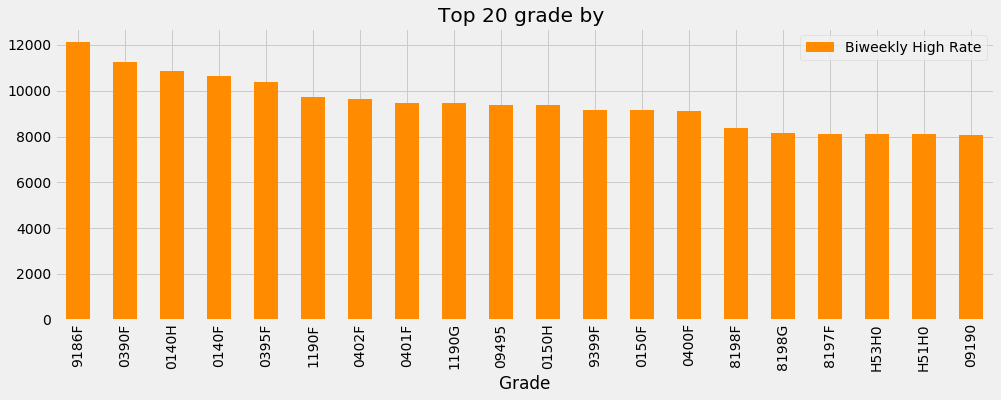

In [125]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values('Biweekly High Rate',ascending=False).head(20).plot.bar(stacked=False,ax=ax,color='darkorange')
ax.set_title('Top 20 grade by ');

In [134]:
sorted_df = salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values('Biweekly High Rate',
                                                                                      ascending=False)


In [133]:
#highest to lowest salary
sorted_df.iloc[0][0] / sorted_df.iloc[-1][0]

13.931919540229886